# Usage: datasets
Here, we will review the raw/cleaned datasets. `Scenario` class performs data cleaning internally using `JHUData` class and so on, but it is important to review the features and data types before analysing them.

### Preparation
Prepare the packages.

In [2]:
# Standard users
# !pip install covsirphy

In [3]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [4]:
from pprint import pprint

In [5]:
import covsirphy as cs
cs.__version__

'2.16.2-beta'

### Dataset preparation
Download the datasets to "input" directory and load them.

If "input" directory has the datasets, `DataLoader` instance will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically and download the datasets to "input" directory and load them.

In [6]:
# Create DataLoader instance
data_loader = cs.DataLoader("input")

In [ ]:
# The number of cases (JHU style)
jhu_data = data_loader.jhu()
# Population in each country
population_data = data_loader.population()
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()

In [7]:
# Linelist of case reports
linelist = data_loader.linelist()
# The number of tests
pcr_data = data_loader.pcr()
# The number of vaccinations
vaccine_data = data_loader.vaccine()
# Population pyramid
pyramid_data = data_loader.pyramid()
# Japan-specific dataset
japan_data = data_loader.japan()

### The number of cases (JHU style)
The main dataset is that of the number of cases and was saved as `jhu_data`, an instance of `JHUData` class. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [8]:
type(jhu_data)

covsirphy.cleaning.jhu_data.JHUData

The dataset will be retrieved from [COVID-19 Data Hub](https://covid19datahub.io/) and [Data folder of CovsirPhy project](https://github.com/lisphilar/covid19-sir/tree/master/data). Description of these projects will be shown as follows.

In [9]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [10]:
# Detailed citation list of COVID-19 Data Hub
# print(data_loader.covid19dh_citation)

In [11]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Tests,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,...,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
29418,2021-02-16,5728,1336.0,1308,21,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
29419,2021-02-17,5728,1336.0,1308,21,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
29420,2021-02-18,5728,1343.0,1308,21,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
29421,2021-02-19,5728,1343.0,1315,21,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02
29422,2021-02-20,5728,1343.0,1315,21,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,81.02


In [12]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
16641,2021-02-15,Japan,-,415782,23733,6952,385097
16642,2021-02-16,Japan,-,417765,23010,7015,387740
16643,2021-02-17,Japan,-,419015,20705,7102,391208
16644,2021-02-18,Japan,-,420408,19718,7196,393494
16645,2021-02-19,Japan,-,421967,19201,7274,395492


In [13]:
jhu_data.cleaned().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421970 entries, 0 to 16645
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       421970 non-null  datetime64[ns]
 1   Country    421970 non-null  category      
 2   Province   421970 non-null  category      
 3   Confirmed  421970 non-null  int64         
 4   Infected   421970 non-null  int64         
 5   Fatal      421970 non-null  int64         
 6   Recovered  421970 non-null  int64         
dtypes: category(2), datetime64[ns](1), int64(4)
memory usage: 21.0 MB


Total number of cases in all countries with `JHUData.total()` method.

In [14]:
# Calculate total values
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2021-02-16,109586827,39254872,2421704,67910251,0.022098,0.619694,0.034432
2021-02-17,109981703,39360946,2432132,68188625,0.022114,0.620000,0.034439
2021-02-18,110384205,39519681,2442858,68421666,0.022131,0.619850,0.034472
2021-02-19,110803230,39709392,2453052,68640786,0.022139,0.619484,0.034504
2021-02-20,110381345,39690214,2445778,68245353,0.022158,0.618269,0.034598


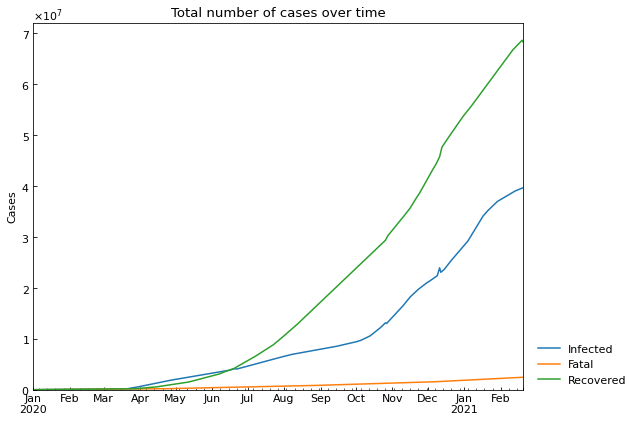

In [15]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

In [16]:
# Statistics of rate values in all countries
total_df.loc[:, total_df.columns.str.contains("per")].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal per Confirmed,416.0,0.041941,0.035337,0.000000,0.023437,0.032720,0.049133,0.333333
Recovered per Confirmed,416.0,0.526929,0.189851,0.018707,0.411225,0.616665,0.651108,1.000000
Fatal per (Fatal or Recovered),416.0,0.095802,0.091254,0.000000,0.036232,0.057877,0.127117,0.538961


We can create a subset for a country using `JHUData.subset()` method.

In [17]:
# Subset for a country
df, _ = jhu_data.records("Japan")
df.tail()
# We can use ISO3 code etc.
# df, _ = jhu_data.records("JPN")
# df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
375,2021-02-15,415782,23733,6952,385097
376,2021-02-16,417765,23010,7015,387740
377,2021-02-17,419015,20705,7102,391208
378,2021-02-18,420408,19718,7196,393494
379,2021-02-19,421967,19201,7274,395492


Province ("prefecture" for Japan) name can be specified.

In [18]:
df, _ = jhu_data.records("Japan", province="Tokyo")
df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
333,2021-02-14,106505,5204,1131,100170
334,2021-02-15,107609,5592,1137,100880
335,2021-02-16,107959,4611,1164,102184
336,2021-02-17,108337,4358,1183,102796
337,2021-02-18,108782,4370,1210,103202


In [19]:
# Countries we can select
pprint(jhu_data.countries(), compact=True)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica',
 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam',
 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See',
 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ira

`JHUData.records()` automatically complement the records, if necesssary and `auto_complement=True` (default). Each country can have either none or one or multiple complements, depending on the records and their preprocessing analysis.

We can show the specific kind of complements that were applied to the records of each country with `JHUData.show_complement()` method. The possible kinds of complement for each country are the following:  

1. "Monotonic_confirmed/fatal/recovered" (monotonic increasing complement)  
Force the variable show monotonic increasing.

2. "Full_recovered" (full complement of recovered data)  
Estimate the number of recovered cases using the value of estimated average recovery period.

3. "Partial_recovered" (partial complement of recovered data)  
When recovered values are not updated for some days, extrapolate the values.

In [ ]:
# Show the details of complement for all countries
jhu_data.show_complement().tail()

In [ ]:
# For selected country
# jhu_data.show_complement(country="Japan")
# For selected province
# jhu_data.show_complement(country="Japan", province="Tokyo")
# For selected countries
# jhu_data.show_complement(country=["Greece", "Japan"])

Note for recovery period:  
With the global cases records, we estimate the average recovery period using `JHUData.calculate_recovery_period()`.  

What we currently do is to calculate the difference between confirmed cases and fatal cases and try to match it to some recovered cases value in the future. We apply this method for every country that has valid recovery data and average the partial recovery periods in order to obtain a single (average) recovery period. During the calculations, we ignore time intervals that lead to very short (<7 days) or very long (>90 days) partial recovery periods, if these exist with high frequency (>50%) in the records. We have to assume temporarily invariable compartments for this analysis to extract an approximation of the average recovery period.

Alternatively, we had tried to use linelist data to get precise value of recovery period (average of recovery date minus confirmation date for cases), but the number of records was too small.

In [ ]:
recovery_period = jhu_data.calculate_recovery_period()
print(f"Average recovery period: {recovery_period} [days]")

We can visualize the number of cases with `.map()` method. When `country` is `None`, global map will be shown.

Global map with country level data:

In [ ]:
# Global map with country level data
jhu_data.map(country=None, variable="Infected")
# To set included/exclude some countries
# jhu_data.map(country=None, variable="Infected", included=["Japan"])
# jhu_data.map(country=None, variable="Infected", excluded=["Japan"])
# To change the date
# jhu_data.map(country=None, variable="Infected", date="01Oct2021")

In [ ]:
# Country level data
jhu_data.layer(country=None).tail()

Country map with province level data:

In [ ]:
# Country map with province level data
jhu_data.map(country="Japan", variable="Infected")
# To set included/exclude some countries
# jhu_data.map(country="Japan", variable="Infected", included=["Tokyo"])
# jhu_data.map(country="Japan", variable="Infected", excluded=["Tokyo"])
# To change the date
# jhu_data.map(country="Japan", variable="Infected", date="01Oct2021")

In [ ]:
# Province level data
jhu_data.layer(country="Japan").tail()

### Linelist of case reports
The number of cases is important, but linelist of case reports will helpful to understand the situation deeply. Linelist data was saved as `linelist`, an instance of `LinelistData` class. This dataset is from [Open COVID-19 Data Working Group](https://github.com/beoutbreakprepared/nCoV2019).

In [ ]:
type(linelist)

In [ ]:
# Citation
print(linelist.citation)

In [ ]:
# Raw dataset
linelist.raw.tail()

In [ ]:
# Cleaned dataset
linelist.cleaned().tail()

In [ ]:
# Subset for specified area
linelist.subset("Japan", province="Tokyo").tail()

In [ ]:
# Subset for outcome ("Recovered" or "Fatal")
linelist.closed(outcome="Recovered").tail()

As the median value of the period from confirmation to recovery, we can calculate recovery period.

In [ ]:
# Recovery period (integer) [days]
linelist.recovery_period()

### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models. This dataset was saved as `population_data`, an instance of `PopulationData` class.

In [ ]:
type(population_data)

In [ ]:
# Description/citation
print(population_data.citation)

In [ ]:
# Raw data (the same as jhu_data)
# population_data.raw.tail()

In [ ]:
# Cleaned data
population_data.cleaned().tail()

We will get the population values with `PopulationData.value()`.

In [ ]:
# In a country
population_data.value("Japan", province=None)
# In a country with ISO3 code
# population_data.value("JPN", province=None)
# In a province (prefecture)
# population_data.value("Japan", province="Tokyo")

We can update the population values.

In [ ]:
# Before
population_before = population_data.value("Japan", province="Tokyo")
print(f"Before: {population_before}")
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_after = population_data.value("Japan", province="Tokyo")
print(f" After: {population_after}")

We can visualize the number of cases with `.map()` method. When `country` is `None`, global map will be shown. Arguments are the same as `JHUData`, but variable name cannot be specified.

In [ ]:
# Global map with country level data
population_data.map(country=None).tail()

In [ ]:
# Country level data
population_data.layer(country=None)

In [ ]:
# Country map with province level data
population_data.map(country="Japan")

In [ ]:
# Province level data
population_data.layer(country="Japan").tail()

### Government Response Tracker (OxCGRT)
Government responses are tracked with [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker). Because government responses and activities of persons change the parameter values of SIR-derived models, this dataset is significant when we try to forcast the number of cases.  
With `DataLoader` class, the dataset was retrieved via [COVID-19 Data Hub](https://covid19datahub.io/) and saved as `oxcgrt_data`, an instance of `OxCGRTData` class.

In [ ]:
type(oxcgrt_data)

In [ ]:
# Description/citation
print(oxcgrt_data.citation)

In [ ]:
# Raw data (the same as jhu_data)
# oxcgrt_data.raw.tail()

In [ ]:
# Cleaned data
oxcgrt_data.cleaned().tail()

In [ ]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()
# We can use ISO3 codes
# oxcgrt_data.subset("JPN").tail()

We can visualize the number of cases with `.map()` method. Arguments are the same as `JHUData`, but country name cannot be specified.

In [ ]:
# Global map with country level data
oxcgrt_data.map(variable="Stringency_index")

In [ ]:
# Country level data
oxcgrt_data.layer().tail()

### The number of tests
The number of tests is also key information to understand the situation.
This dataset was saved as `pcr_data`, an instance of `PCRData` class.

In [ ]:
type(pcr_data)

In [ ]:
# Description/citation
print(pcr_data.citation)

In [ ]:
# Raw data (the same as jhu_data)
# pcr_data.raw.tail()

In [ ]:
# Cleaned data
pcr_data.cleaned().tail()

In [ ]:
# Subset for a country
pcr_data.subset("Japan").tail()
# We can use ISO3 codes
# pcr_data.subset("JPN").tail()

Under the assumption that all tests were PCR test, we can calculate the positive rate of PCR tests as "the number of confirmed cases per the number of tests".

In [ ]:
# Positive rate in Japan
_ = pcr_data.positive_rate("Japan")

We can visualize the number of cases with `.map()` method. When `country` is `None`, global map will be shown. Arguments are the same as `JHUData`, but variable name cannot be specified.

In [ ]:
# Global map with country level data
pcr_data.map(country=None)

In [ ]:
# Country level data
pcr_data.layer(country=None).tail()

In [ ]:
# Country map with province level data
pcr_data.map(country="Japan")

In [ ]:
# Province level data
pcr_data.layer(country="Japan")

### The number of vaccinations
The number of vaccinations is a key factor to end the outbreak as soon as possible. This dataset was saved as `vaccine_data`, an instance of `VaccineData` class.

In [ ]:
# The number of vaccinations
type(vaccine_data)

In [ ]:
# Description/citation
print(vaccine_data.citation)

In [ ]:
# Raw data
# vaccine_data.raw.tail()

In [ ]:
# Cleaned data
vaccine_data.cleaned().tail()

In [ ]:
# Registered countries
pprint(vaccine_data.countries(), compact=True)

In [ ]:
# Subset for a country
vaccine_data.subset("United Kingdom").tail()
# We can use ISO3 codes
# pcr_data.subset("GBR").tail()

We can visualize the number of cases with `.map()` method. Arguments are the same as `JHUData`, but country name and variable name cannot be specified.

In [ ]:
# Global map with country level data
vaccine_data.map()

In [ ]:
# Country level data
vaccine_data.layer()

### Population pyramid
With population pyramid, we can divide the population to sub-groups. This will be useful when we analyse the meaning of parameters. For example, how many days go out is different between the sub-groups.
This dataset was saved as `pyramid_data`, an instance of `PopulationPyramidData` class.

In [ ]:
# Population pyramid
type(pyramid_data)

In [ ]:
# Description/citation
print(pyramid_data.citation)

In [ ]:
# Subset will retrieved from the server when set
pyramid_data.subset("Japan").tail()

### Japan-specific dataset
This includes the number of confirmed/infected/fatal/recovered/tests/moderate/severe cases at country/prefecture level and metadata of each prefecture.
This dataset was saved as `japan_data`, an instance of `JapanData` class.

In [ ]:
# Japan-specific dataset
type(japan_data)

In [ ]:
# Description/citation
print(japan_data.citation)

In [ ]:
# Cleaned dataset
japan_data.cleaned().tail()

In [ ]:
# Metadata
japan_data.meta().tail()

We can visualize the number of cases with `.map()` method. Arguments are the same as `JHUData`, but country name cannot be specified.

In [ ]:
# Country map with province level data
japan_data.map(variable="Severe")

In [ ]:
# Province level data
japan_data.layer(country="Japan")

Map with country level data is not prepared, but country level data can be retrieved.

In [ ]:
# Country level data
japan_data.layer(country=None).tail()